# Medical Data Visualizer

This project explores and visualizes patient medical examination data. It focuses on identifying health risk indicators and visualizing correlations between lifestyle and medical conditions.

The dataset is loaded from `medical_examination.csv` and analyzed through the following steps:

## 🩺 Key Features

- **BMI calculation** to determine if a patient is overweight (BMI > 25).
- **Normalization** of medical indicators: 0 = healthy, 1 = unhealthy (applied to cholesterol and glucose levels).
- **Categorical Plot** (`draw_cat_plot()`): generates side-by-side bar plots comparing binary health indicators between patients with and without cardiovascular disease.
- **Heat Map** (`draw_heat_map()`): creates a visual correlation matrix after cleaning the dataset, using `seaborn.heatmap()` and masking the upper triangle.

## 🛠️ Tools & Libraries

- Python
- Pandas
- Seaborn
- Matplotlib
- NumPy

---

*This project was developed as part of the freeCodeCamp Data Analysis with Python certification.*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1 Import the data from medical_examination.csv and assign it to the df variable.
df  = pd.read_csv('medical_examination.csv')

In [3]:
# 2 dd an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
weight_kilograms = df['weight']
height_meters_squared = (df['height']/100)**2

df['overweight'] = weight_kilograms/height_meters_squared

df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1

df['overweight'] = df['overweight'].astype(int)

In [4]:
# 3 Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

df[['cholesterol','gluc']].astype(int)

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
69995,0,0
69996,1,1
69997,1,0
69998,0,1


In [5]:
# 4 Draw the Categorical Plot in the draw_cat_plot function.
def draw_cat_plot():
    # 5 Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
    df_cat = pd.melt(df, id_vars = 'cardio', value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # 6 Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).value_counts().reset_index(name='counts')
    

    # 7 Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
    chart = sns.catplot(x='variable', y='counts', hue='value', col='cardio', kind='bar', data=df_cat)


    # 8 Get the figure for the output and store it in the fig variable.
    fig = chart


    # 9 Do not modify the next two lines.
    fig.savefig('catplot.png')
    return fig

In [9]:
# 10 Draw the Heat Map in the draw_heat_map function.
def draw_heat_map():
    # 11 Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
        # * diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
        # * height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
        # * height is more than the 97.5th percentile
        # * weight is less than the 2.5th percentile
        # * weight is more than the 97.5th percentile
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025))& (df['weight'] <= df['weight'].quantile(0.975))]


    # 12 Calculate the correlation matrix and store it in the corr variable.
    corr = df_heat.corr()

    # 13 Generate a mask for the upper triangle and store it in the mask variable.
    mask = np.triu(corr)
    
    # 14 Set up the matplotlib figure.
    fig, ax = plt.subplots(figsize=(10,6)) 

    # 15 Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().
    dataplot = sns.heatmap(corr, mask = mask, vmax = 0.3, center = 0, annot = True,
           square = True, linewidths=0.5, cbar_kws={"shrink": 0.5}, fmt='.1f') 

    # 16 Do not modify the next two lines.
    fig.savefig('heatmap.png')
    plt.close(fig)
    return fig

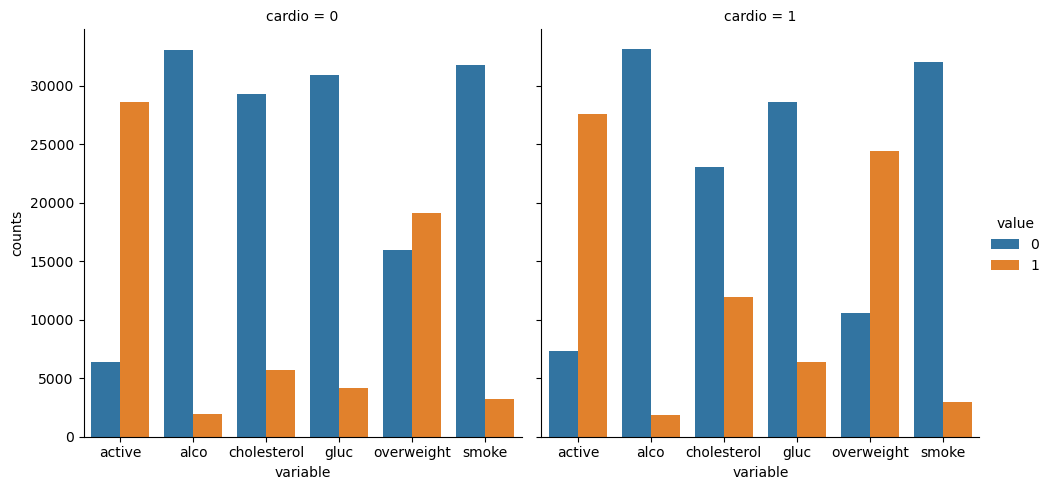

In [10]:
draw_cat_plot()

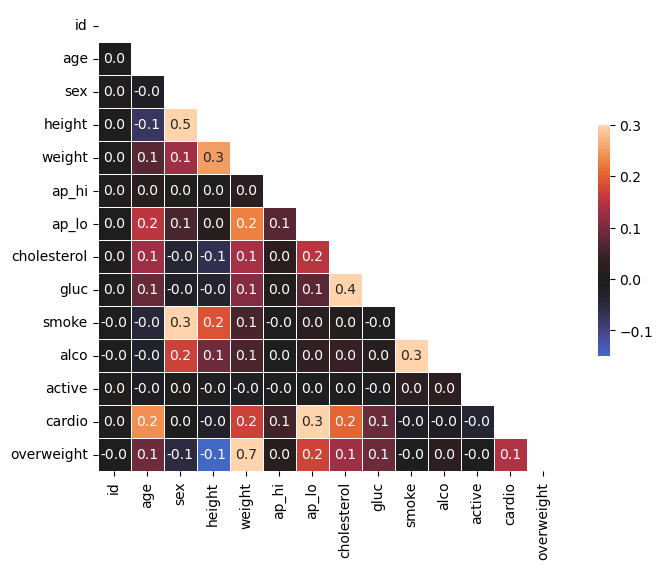

In [11]:
draw_heat_map()